# Demonstration of evaluation tools for Task 3
Evaluate and analyze results for Task 3: "Detection of graticule lines intersections".

In [1]:
# Those are the imports you may need.
from icdar21_mapseg_eval.point_detection import (
    eval_pt_detect, show_predictions, show_predictions_classified, plot_f_vs_dist_curve)

In [2]:
# Extra imports for the demo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Evaluation parameters

In [3]:
# This is arbitrary, for the competition `radius_limit` is set to 50 pixels.
radius_limit = 118
# Beta for the F_beta score
beta = 0.5

## Sample data

In [4]:
ground_truth = np.float32([
    [5710, 1170],  # A
    [8080, 1170],  # B
    [3330, 3530],  # C
    [5710, 3550],  # D
    [8085, 3540],  # E
    [3327, 5922],  # F
    [5715, 5940],  # G
    [8085, 5942]]) # H

In [5]:
predicted = np.float32([
    # A
    [5710, 1170], # exact match
    # B
    [8080 + 2*radius_limit, 1170+2*radius_limit], # Match outside acceptable area
    # C
    [3330+10, 3530+10], # multiple acceptable matches
    [3330-10, 3530-10],
    [3330+10, 3530+0],
    [3330+10, 3530+30],
    # D
    [5710+10, 3550-10], # 1 good match
    # E
    [8085+radius_limit, 3540], # far match, on the edge (will be accepted)
    # F
    # Nothing, no match
    # G and H
    [(5715+8085)/2, (5940+5942)/2] # point on the perpendicular bisector of the two points
])

# 1. Visualize raw predictions

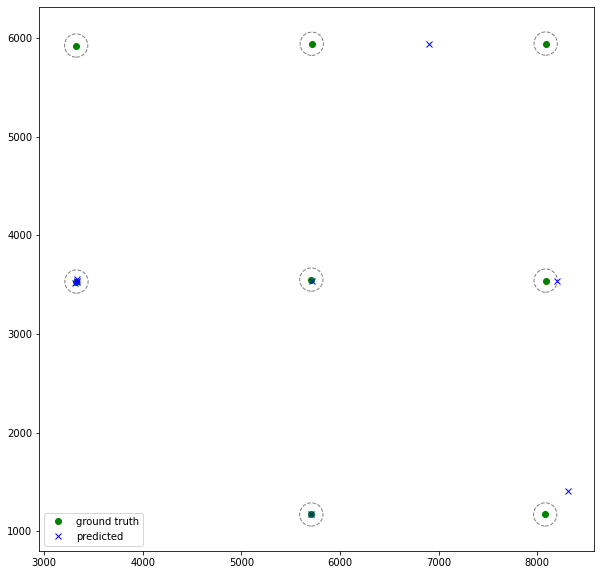

In [6]:
show_predictions(ground_truth, predicted, radius_limit)

# 2. Evaluation metrics for a single image

Considering predicted point 00: ( 5710.0, 1170.0)
	Matches gt point 00: ( 5710.0, 1170.0) @ 0.0
	First match (good)
	tp:  1, fn:  7, fp:  8, |expt|:8, |pred|:9, x:0.00, y:0.11, area:0.000
Considering predicted point 04: ( 3340.0, 3530.0)
	Matches gt point 02: ( 3330.0, 3530.0) @ 10.0
	First match (good)
	tp:  2, fn:  6, fp:  7, |expt|:8, |pred|:9, x:0.08, y:0.23, area:0.014
Considering predicted point 02: ( 3340.0, 3540.0)
	Matches gt point 02: ( 3330.0, 3530.0) @ 14.1
	EXTRA MATCH (noise)
Considering predicted point 03: ( 3320.0, 3520.0)
	Matches gt point 02: ( 3330.0, 3530.0) @ 14.1
	EXTRA MATCH (noise)
Considering predicted point 06: ( 5720.0, 3540.0)
	Matches gt point 03: ( 5710.0, 3550.0) @ 14.1
	First match (good)
	tp:  3, fn:  5, fp:  6, |expt|:8, |pred|:9, x:0.12, y:0.34, area:0.024
Considering predicted point 05: ( 3340.0, 3560.0)
	Matches gt point 02: ( 3330.0, 3530.0) @ 31.6
	EXTRA MATCH (noise)
Considering predicted point 07: ( 8203.0, 3540.0)
	Matches gt point 04: ( 8085.0

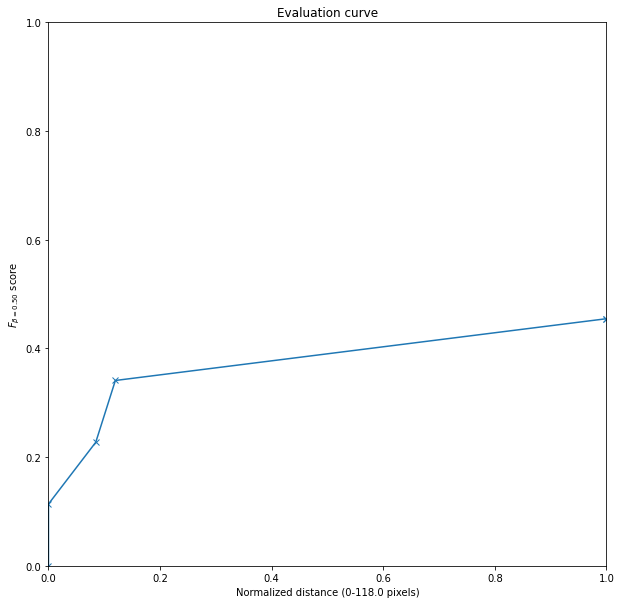

In [7]:
# debug=True displays matches
# score is the AUC of f_beta vs distance
# details is a dataframe containing match and score information for each predicted point
# plt_data is the curve to plot
score, details, plt_data = eval_pt_detect(ground_truth, predicted, radius_limit, 
                                          beta=beta, debug=True, show_plot=True)

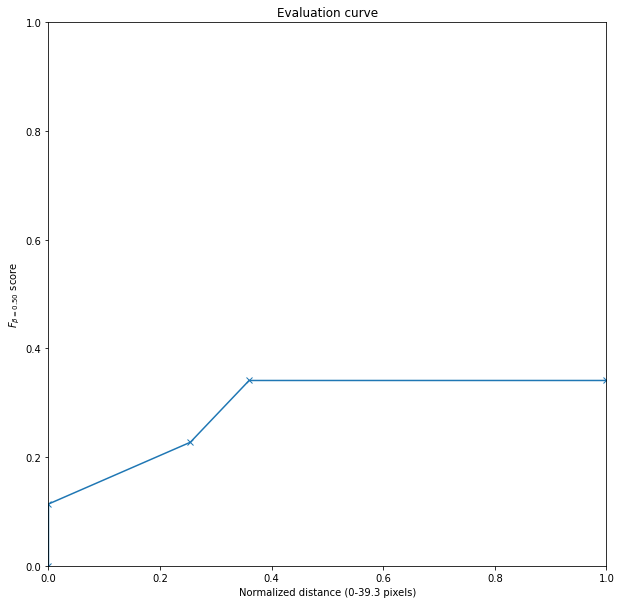

0.2915897501635441

In [8]:
# A different radius_limit gives a different result
score, details, plt_data = eval_pt_detect(ground_truth, predicted, radius_limit/3, 
                                          beta=beta, debug=False, show_plot=True)
score

In [9]:
# Matching details provide extra help for debugging:
details

,Precision,Recall,F-beta,True Positives,False Positives,False Negatives,Error type,Prediction x,Prediction y
Distance,,,,,,,,,
0.000000,0.111111,0.125,0.113636,1,8,7,0,5710.0,1170.0
10.000000,0.222222,0.250,0.227273,2,7,6,0,3340.0,3530.0
14.142136,0.222222,0.250,0.227273,2,7,6,1,3340.0,3540.0
14.142136,0.222222,0.250,0.227273,2,7,6,1,3320.0,3520.0
14.142136,0.333333,0.375,0.340909,3,6,5,0,5720.0,3540.0
31.622776,0.333333,0.375,0.340909,3,6,5,1,3340.0,3560.0
118.000000,0.333333,0.375,0.340909,3,6,5,2,8203.0,3540.0
333.754395,0.333333,0.375,0.340909,3,6,5,2,8316.0,1406.0
1185.000366,0.333333,0.375,0.340909,3,6,5,2,6900.0,5941.0


Code for error types:

- `0`: correct match (true positive)
- `1`: extra match withing acceptable range (error)
- `2`: too far -- out of acceptable range (error)

# 3. Curve used to compute the AUC

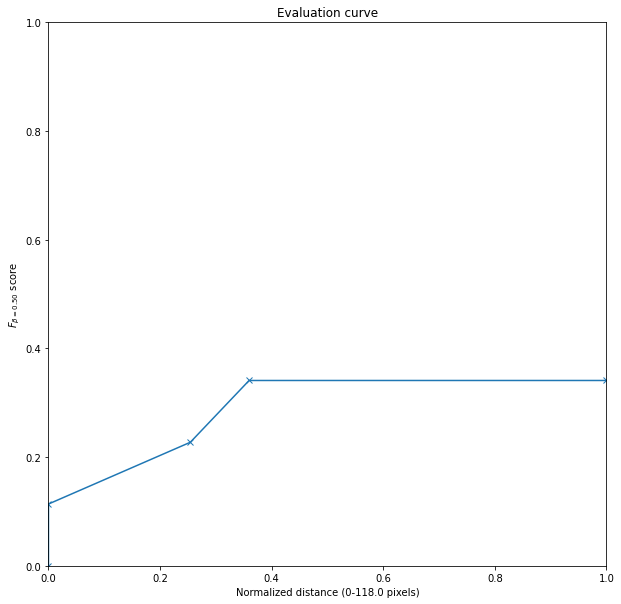

In [10]:
plot_f_vs_dist_curve(plt_data, radius_limit, beta=0.5)

In [11]:
# We can check we obtain the same results as the auc function from scikit-learn
from sklearn.metrics import auc

In [12]:
auc(plt_data["Normalized distance"], plt_data["F-beta"])

0.2915897501635441

In [13]:
score

0.2915897501635441

In [14]:
plt_data

,Normalized distance,F-beta
0,0.000000,0.000000
1,0.000000,0.113636
2,0.254237,0.227273
3,0.359546,0.340909
4,1.000000,0.340909


# 4. Show predictions according to error type

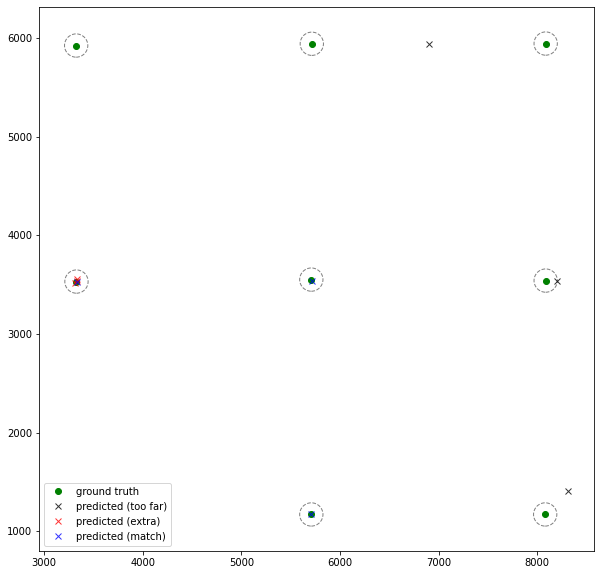

In [15]:
# We can show predictions with a different color according to whether they are correct or not
show_predictions_classified(ground_truth, details, radius_limit)

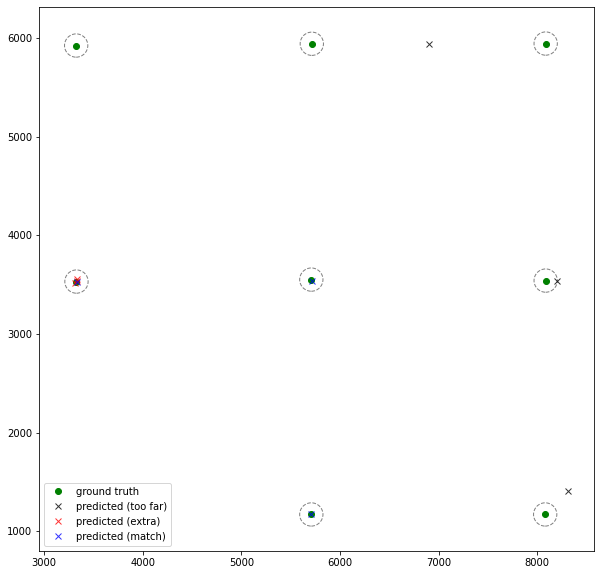

In [16]:
# And you can save the figure for further study
show_predictions_classified(ground_truth, details, radius_limit, filename="out.pdf")

# 97. More tests
We keep here some tests to show the implementation is correct.

Propagating to right limit
x:1.00, y:0.00, area:0.00
Score: 0.000


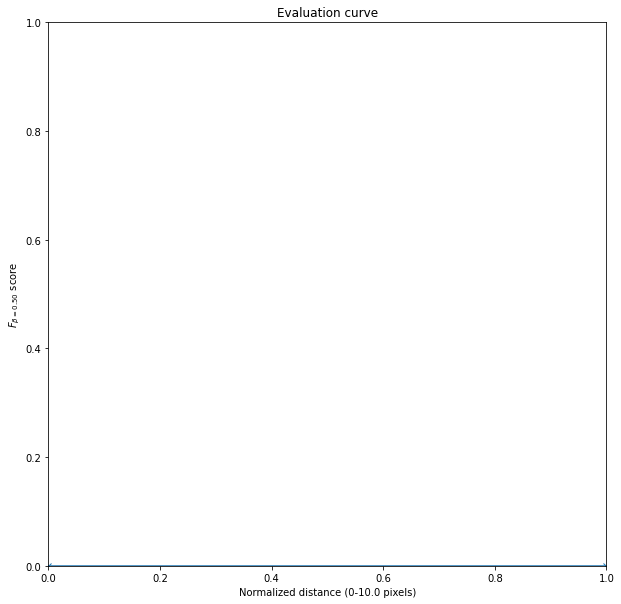

(0.0,
 Empty DataFrame
 Columns: [Precision, Recall, F-beta, True Positives, False Positives, False Negatives, Error type, Prediction x, Prediction y]
 Index: [])

In [17]:
# Empty prediction: zero auc
area, df, _ = eval_pt_detect(np.array([(0,0), (1,1)]), np.empty((0,2)), 10, beta=0.5, debug=True, show_plot=True)
area, df

Propagating to right limit
x:1.00, y:0.00, area:0.00
Score: 0.000


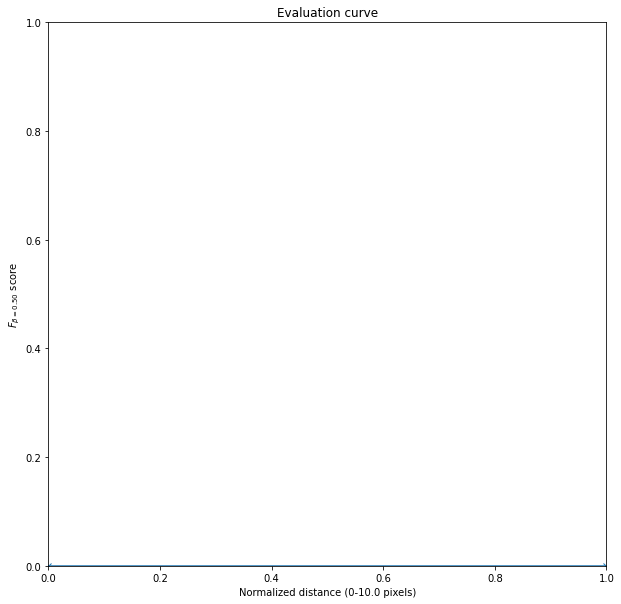

(0.0,
 Empty DataFrame
 Columns: [Precision, Recall, F-beta, True Positives, False Positives, False Negatives, Error type, Prediction x, Prediction y]
 Index: [])

In [18]:
# Empty prediction and ground truth
area, df, _ = eval_pt_detect(np.empty((0,2)), np.empty((0,2)), 10, beta=0.5, debug=True, show_plot=True)
area, df

Considering predicted point 00: (    0.0,    0.0)
Reached radius limit (10)
Considering predicted point 01: (    1.0,    1.0)
Reached radius limit (10)
Propagating to right limit
x:1.00, y:0.00, area:0.00
Score: 0.000


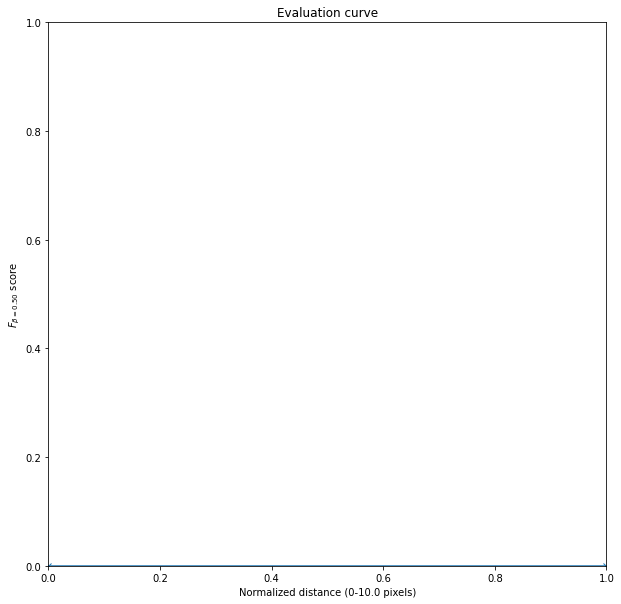

(0.0,
           Precision  Recall  F-beta  True Positives  False Positives  \
 Distance                                                               
 inf             0.0       0     0.0               0                2   
 inf             0.0       0     0.0               0                2   
 
           False Negatives  Error type  Prediction x  Prediction y  
 Distance                                                           
 inf                     0           2             0             0  
 inf                     0           2             1             1  )

In [19]:
# Empty ground truth
area, df, df_dbg = eval_pt_detect(np.empty((0,2)), np.array([(0,0), (1,1)]), 10, beta=0.5, debug=True, show_plot=True)
area, df

Considering predicted point 00: (    1.0,    1.0)
	Matches gt point 01: (    1.0,    1.0) @ 0.0
	First match (good)
	tp:  1, fn:  1, fp:  0, |expt|:2, |pred|:1, x:0.00, y:0.83, area:0.000
Propagating to right limit
x:1.00, y:0.83, area:0.83
Score: 0.833


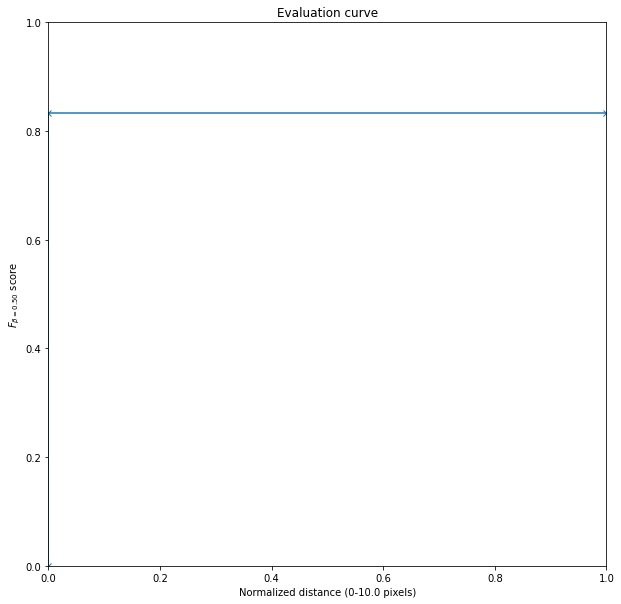

(0.8333333333333334,
           Precision  Recall    F-beta  True Positives  False Positives  \
 Distance                                                                 
 0.0             1.0     0.5  0.833333               1                0   
 
           False Negatives  Error type  Prediction x  Prediction y  
 Distance                                                           
 0.0                     1           0             1             1  ,
    Normalized distance    F-beta
 0                  0.0  0.000000
 1                  0.0  0.833333
 2                  1.0  0.833333)

In [20]:
# 1 perfect match over 2 targets
eval_pt_detect(np.array([(0,0), (1,1)]), np.array([(1,1)]), 10, beta=0.5, debug=True, show_plot=True)

Considering predicted point 00: (    0.0,    0.0)
	Matches gt point 00: (    0.0,    0.0) @ 0.0
	First match (good)
	tp:  1, fn:  1, fp:  0, |expt|:2, |pred|:1, x:0.00, y:0.83, area:0.000
Propagating to right limit
x:1.00, y:0.83, area:0.83
Score: 0.833


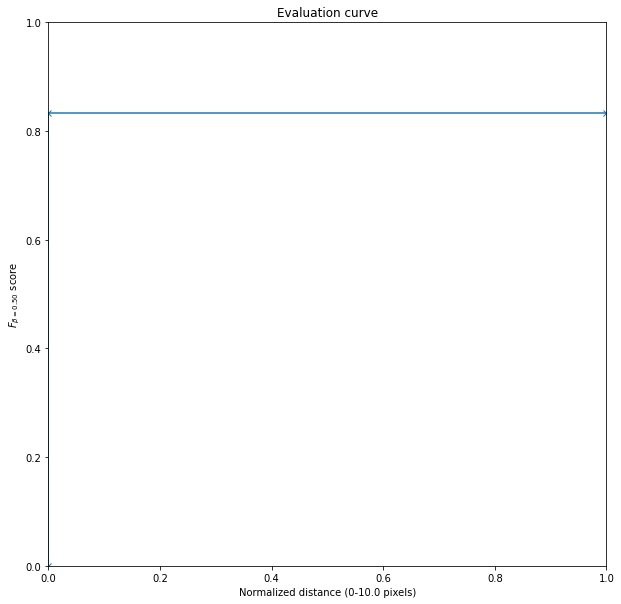

(0.8333333333333334,
           Precision  Recall    F-beta  True Positives  False Positives  \
 Distance                                                                 
 0.0             1.0     0.5  0.833333               1                0   
 
           False Negatives  Error type  Prediction x  Prediction y  
 Distance                                                           
 0.0                     1           0             0             0  ,
    Normalized distance    F-beta
 0                  0.0  0.000000
 1                  0.0  0.833333
 2                  1.0  0.833333)

In [21]:
# same
eval_pt_detect(np.array([(0,0), (1,1)]), np.array([(0,0)]), 10, beta=0.5, debug=True, show_plot=True)

Considering predicted point 00: (    0.0,    0.0)
	Matches gt point 00: (    0.0,    0.0) @ 0.0
	First match (good)
	tp:  1, fn:  0, fp:  1, |expt|:1, |pred|:2, x:0.00, y:0.56, area:0.000
Considering predicted point 01: (    1.0,    1.0)
	Matches gt point 00: (    0.0,    0.0) @ 1.4
	EXTRA MATCH (noise)
Propagating to right limit
x:1.00, y:0.56, area:0.56
Score: 0.556


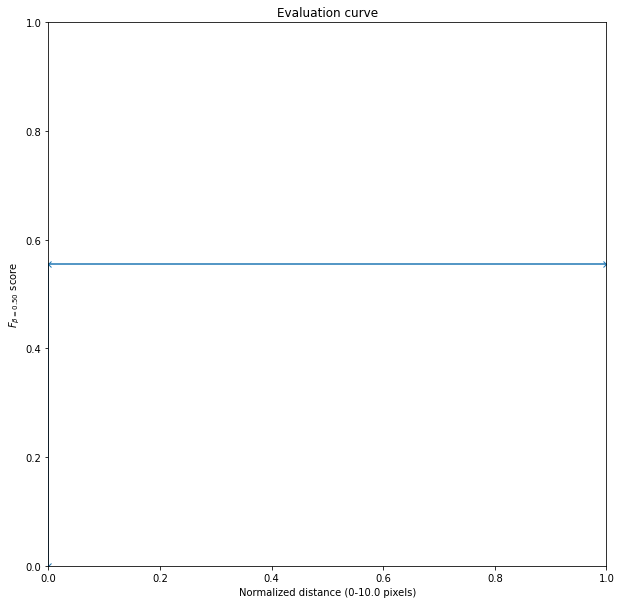

(0.5555555555555556,
           Precision  Recall    F-beta  True Positives  False Positives  \
 Distance                                                                 
 0.000000        0.5     1.0  0.555556               1                1   
 1.414214        0.5     1.0  0.555556               1                1   
 
           False Negatives  Error type  Prediction x  Prediction y  
 Distance                                                           
 0.000000                0           0             0             0  
 1.414214                0           1             1             1  ,
    Normalized distance    F-beta
 0                  0.0  0.000000
 1                  0.0  0.555556
 2                  1.0  0.555556)

In [22]:
# 1 perfect match and 1 extra match
eval_pt_detect(np.array([(0,0)]), np.array([(0,0), (1,1)]), 10, beta=0.5, debug=True, show_plot=True)

Considering predicted point 00: (    2.0,    0.0)
	Matches gt point 00: (    0.0,    0.0) @ 2.0
	First match (good)
	tp:  1, fn:  1, fp:  0, |expt|:2, |pred|:1, x:0.50, y:0.83, area:0.208
Propagating to right limit
x:1.00, y:0.83, area:0.62
Score: 0.625


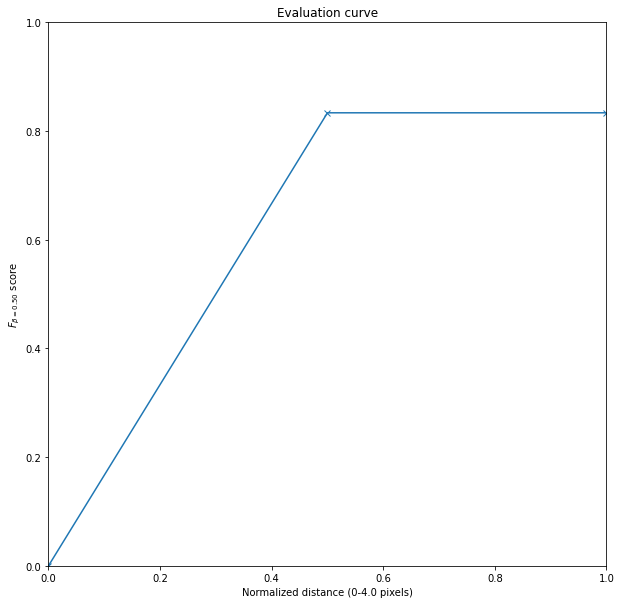

(0.625,
           Precision  Recall    F-beta  True Positives  False Positives  \
 Distance                                                                 
 2.0             1.0     0.5  0.833333               1                0   
 
           False Negatives  Error type  Prediction x  Prediction y  
 Distance                                                           
 2.0                     1           0             2             0  ,
    Normalized distance    F-beta
 0                  0.0  0.000000
 1                  0.5  0.833333
 2                  1.0  0.833333)

In [23]:
# 1 match, 1 miss
eval_pt_detect(np.array([(0,0), (10,10)]), np.array([(2,0)]), 4, beta=0.5, debug=True, show_plot=True)

Considering predicted point 00: (   10.0,    0.0)
	Matches gt point 00: (    0.0,    0.0) @ 10.0
	First match (good)
	tp:  1, fn:  0, fp:  0, |expt|:1, |pred|:1, x:1.00, y:1.00, area:0.500
Propagating to right limit
x:1.00, y:1.00, area:0.50
Score: 0.500


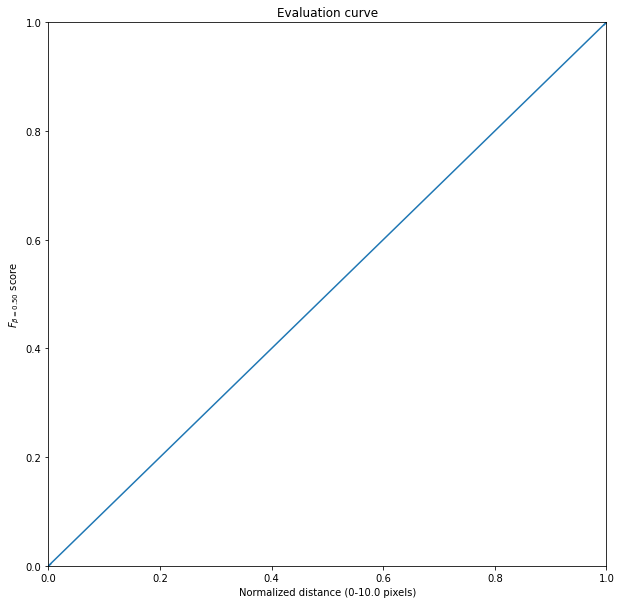

(0.5,
           Precision  Recall  F-beta  True Positives  False Positives  \
 Distance                                                               
 10.0            1.0     1.0     1.0               1                0   
 
           False Negatives  Error type  Prediction x  Prediction y  
 Distance                                                           
 10.0                    0           0            10             0  ,
    Normalized distance  F-beta
 0                  0.0     0.0
 1                  1.0     1.0
 2                  1.0     1.0)

In [24]:
# 1 match on edge
eval_pt_detect(np.array([(0,0)]), np.array([(10,0)]), 10, beta=0.5, debug=True, show_plot=True)

Considering predicted point 00: (    0.0,    0.0)
	Matches gt point 00: (    0.0,    0.0) @ 0.0
	First match (good)
	tp:  1, fn:  0, fp:  1, |expt|:1, |pred|:2, x:0.00, y:0.56, area:0.000
Considering predicted point 01: (    0.0,    0.0)
	Matches gt point 00: (    0.0,    0.0) @ 0.0
	EXTRA MATCH (noise)
Propagating to right limit
x:1.00, y:0.56, area:0.56
Score: 0.556


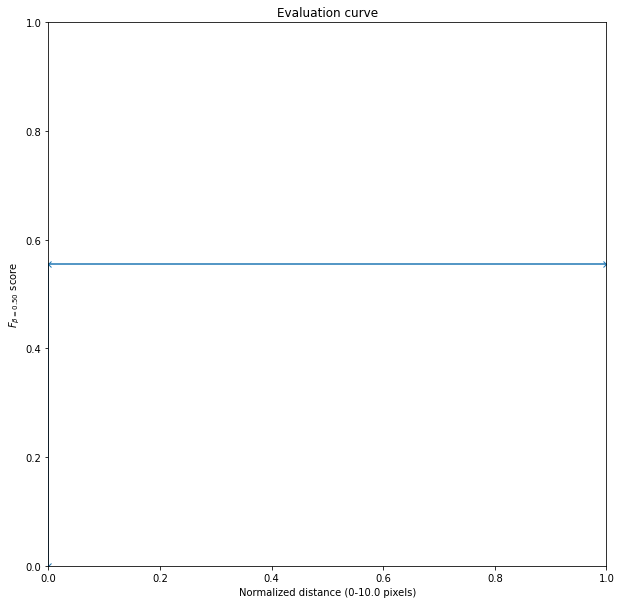

0.5555555555555556

In [25]:
# duplicate matches
area, _, _ = eval_pt_detect(np.array([(0,0)]), np.array([(0,0), (0,0)]), 10, beta=0.5, debug=True, show_plot=True)
area

# 98. Influence of the `radius_limit` parameter

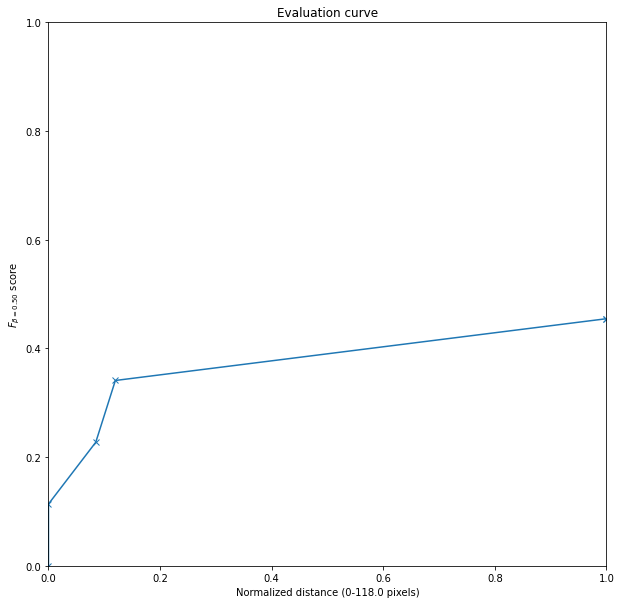

0.37447791253840795

In [26]:
area, _, _ = eval_pt_detect(ground_truth, predicted, radius_limit, beta=0.5, debug=False, show_plot=True)
area

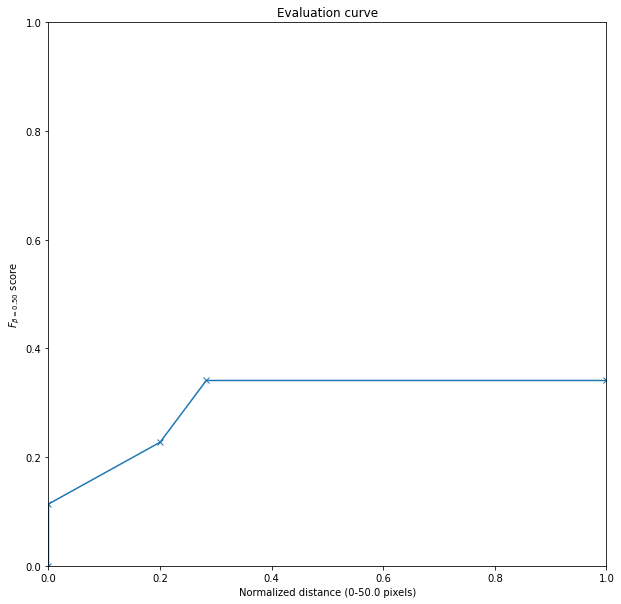

0.30211120952259407

In [27]:
area, _, _ = eval_pt_detect(ground_truth, predicted, 50, beta=0.5, debug=False, show_plot=True)
area

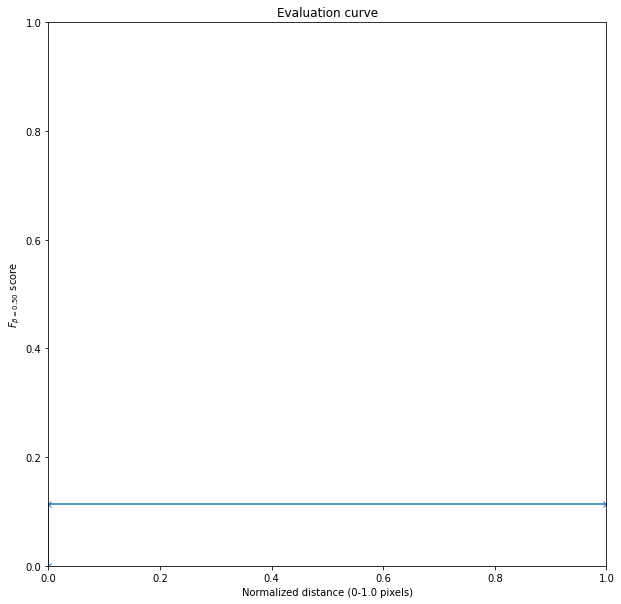

0.11363636363636363

In [28]:
area, _, _ = eval_pt_detect(ground_truth, predicted, 1, beta=0.5, debug=False, show_plot=True)
area

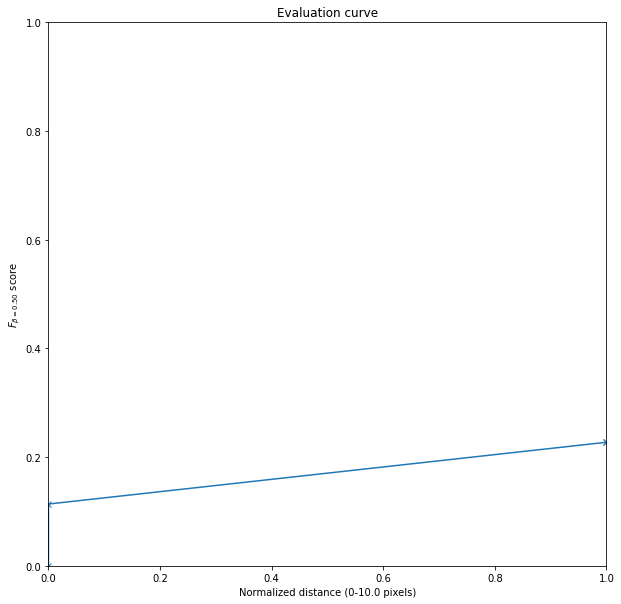

0.17045454545454544

In [29]:
area, _, _ = eval_pt_detect(ground_truth, predicted, 10, beta=0.5, debug=False, show_plot=True)
area

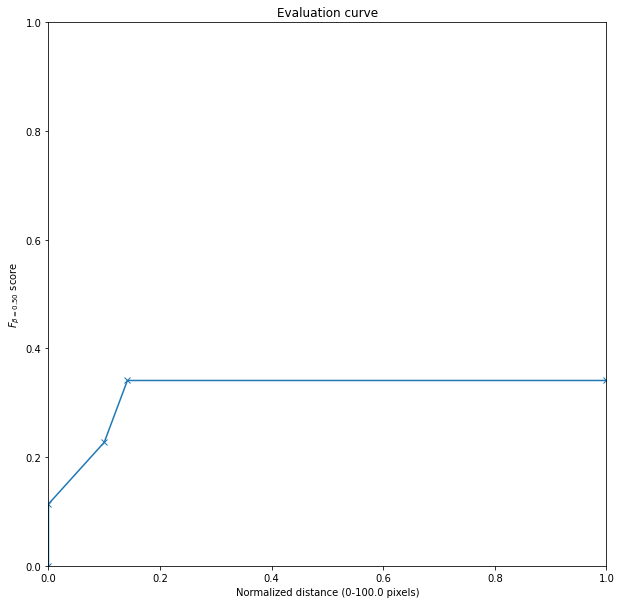

0.32151015021584245

In [30]:
area, _, _ = eval_pt_detect(ground_truth, predicted, 100, beta=0.5, debug=False, show_plot=True)
area

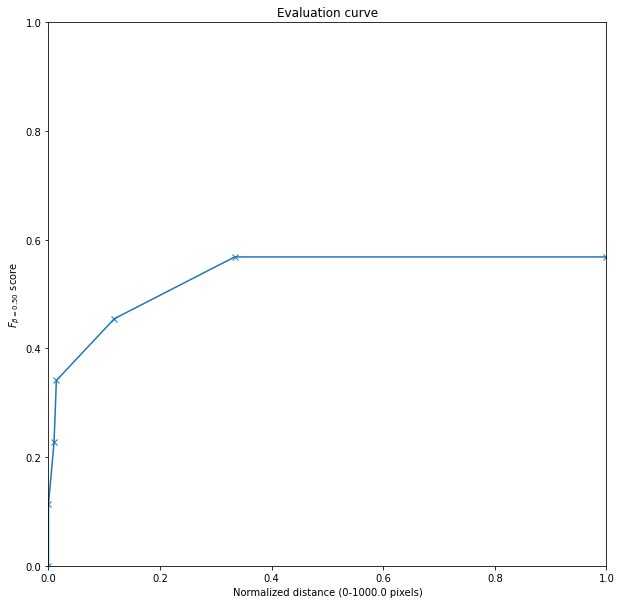

0.5330659848993475

In [31]:
area, _, _ = eval_pt_detect(ground_truth, predicted, 1000, beta=0.5, debug=False, show_plot=True)
area

# 99. Fuzzy testing
We also generated some random tests for extra safety.

In [32]:
 np.random.seed(42)

In [33]:
targets = np.float32(np.random.randint(0,10000,(5,2)))

In [34]:
from scipy.spatial import distance_matrix

In [35]:
dmat = distance_matrix(targets, targets)
dmat[np.diag_indices_from(dmat)] = np.inf
radius_limit = np.min(dmat) / 3
radius_limit

375.9154751329672

In [36]:
predictions = np.float32(np.random.randint(0,10000,(100,2)))

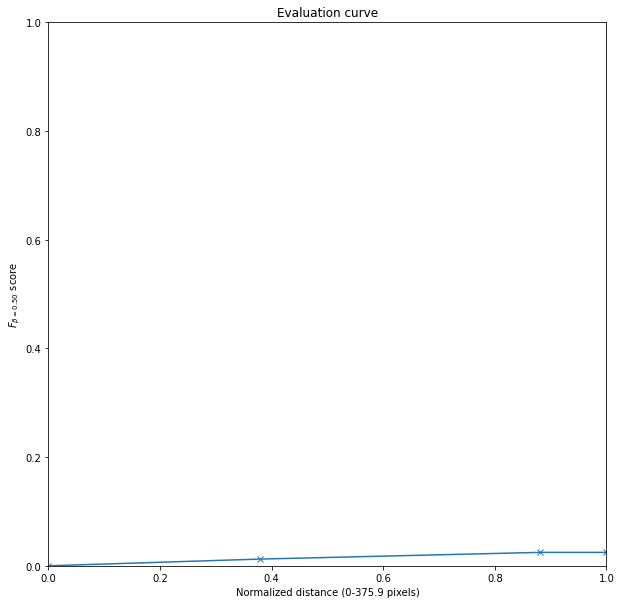

0.014580940066544888

In [37]:
score, details, _ = eval_pt_detect(targets, predictions, radius_limit, beta=0.5, debug=False, show_plot=True)
score

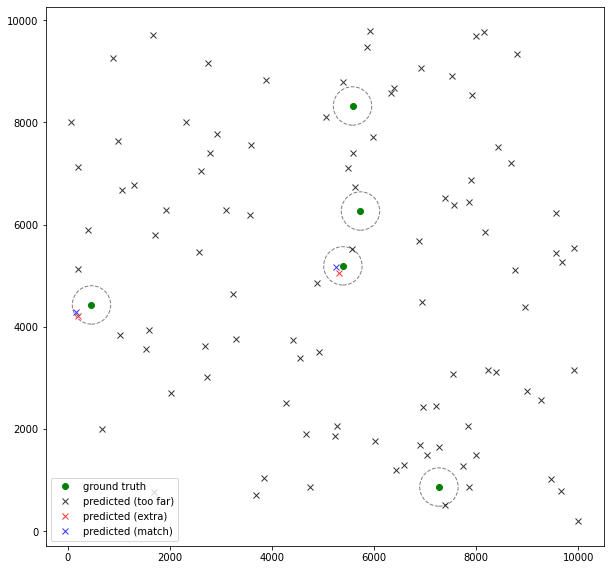

In [38]:
show_predictions_classified(targets, details, radius_limit)

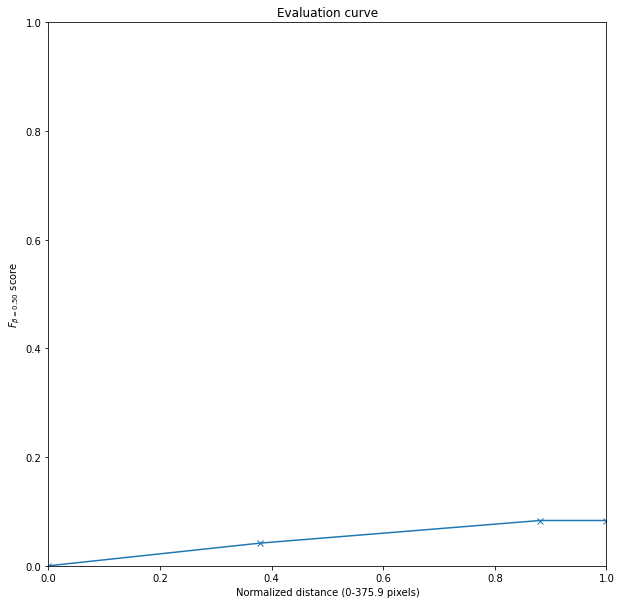

In [39]:
_ = eval_pt_detect(predictions, targets, radius_limit, beta=0.5, debug=False, show_plot=True)

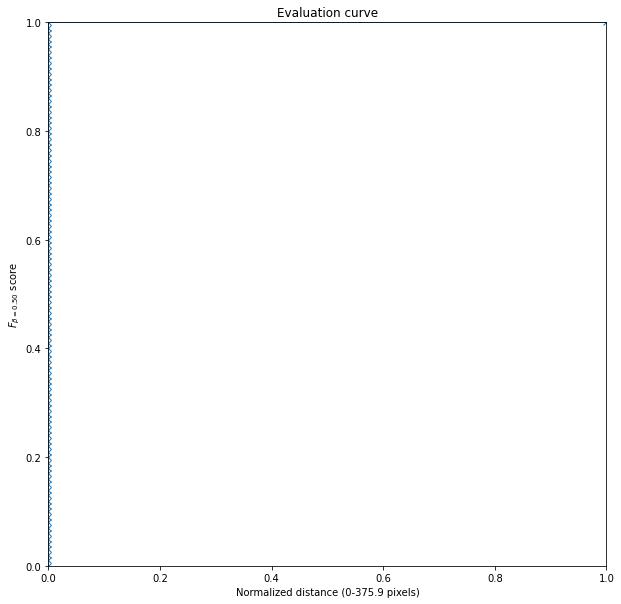

1.0

In [40]:
# Evaluation against self should give maximal score
area, _, _ = eval_pt_detect(predictions, predictions, radius_limit, beta=0.5, debug=False, show_plot=True)
area